In [24]:
from truth_table import *
from typing import List

input_str = 'A or (B2(c,d+1) and forall x C1(x)) imp forall x C1(x) and B2(c,d+1)'
node = parse_text(input_str)
assert isinstance(node, Node)
fmla = Formula(node)
fmla1 = Formula(input_str)
assert isinstance(fmla1, Formula)
assert fmla1 == fmla

print(fmla)

A or (B2(c, d + 1) and forall x C1(x)) imp forall x C1(x) and B2(c, d + 1)


<IPython.core.display.Math object>

A or (B2(c, d + 1) and forall x C1(x)) imp forall x C1(x) and B2(c, d + 1)


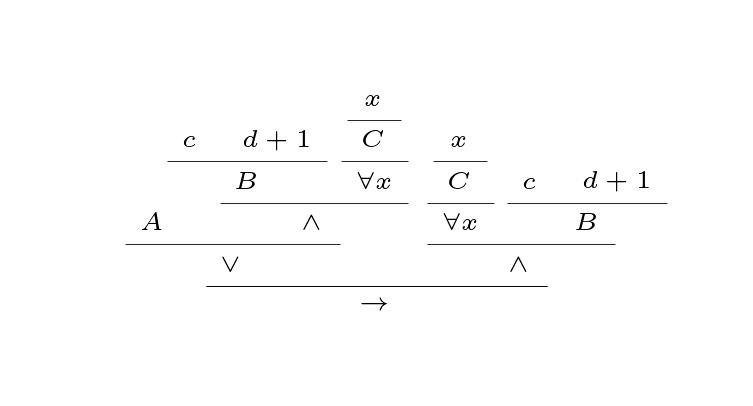

In [25]:
fmla.display_infix()
fmla.display_infix('text')
fmla.ast.draw_tree()

<IPython.core.display.Math object>

exists x A1(x) or bot imp C2(x, c^{2 + a}) or (B iff not exists x A1(x))
imp or exists x A1 x bot or C2 x ^ c + 2 a iff B not exists x A1 x
['C2(x, c^{2 + a})', 'exists x A1(x)', 'B']


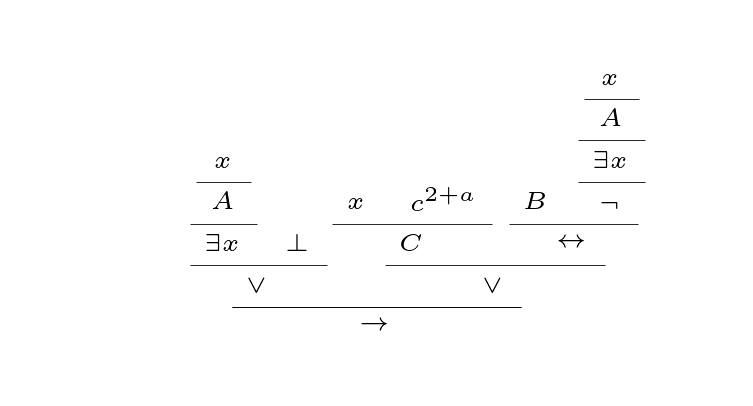

In [26]:
fmla_x = Formula("exists x A1(x) or bot imp C2(x,c^(2+a)) or (B iff not exists x A1(x))")
fmla_x.ast.draw_tree()
fmla_x.display_infix()
print(fmla_x)
print(fmla_x.ast)
print(prime_subs_li := list(fmla_x.get_prime_subformulas()))

In [27]:
def show_tree_nodes(tree: Node) -> None: # 
# This function closely follows the code of Formula.get_bValues(), 
# utilizing an in-order traversal approach.
  def show_this_node(node: Node):
    print(f"{node.token.value}, id={node.index}, " +
          f"bVal={node.bValue}", f"alt_str={node.alt_str}")

  token = tree.token
  if token.token_type in Token.FMLA_ROOTS:
    if token.token_type in Token.NON_PRIME_ROOTS:
      if token.arity == 1:
        show_this_node(tree) # unary connective is prefixed
        show_tree_nodes(tree.children[0])
      else: # arity == 2
        show_tree_nodes(tree.children[0])
        show_this_node(tree) # binary connective is infixed
        show_tree_nodes(tree.children[1])
    else: # token_type in PRIME_ROOT
      show_this_node(tree)


In [28]:
fmla_x.label_prime_subs(prime_subs_li)
print("Prime subformulas labeled:\n")
show_tree_nodes(fmla_x.ast)

Prime subformulas labeled:

exists, id=1, bVal=-1 alt_str=P_1
or, id=-1, bVal=-1 alt_str=
bot, id=-1, bVal=-1 alt_str=
imp, id=-1, bVal=-1 alt_str=
C2, id=0, bVal=-1 alt_str=P_2
or, id=-1, bVal=-1 alt_str=
B, id=2, bVal=-1 alt_str=B
iff, id=-1, bVal=-1 alt_str=
not, id=-1, bVal=-1 alt_str=
exists, id=1, bVal=-1 alt_str=P_1


In [29]:
fmla_x.get_truth_tree('101')
print("Truth tree:\n")
show_tree_nodes(fmla_x.ast)

Truth tree:

exists, id=1, bVal=0 alt_str=P_1
or, id=-1, bVal=0 alt_str=
bot, id=-1, bVal=0 alt_str=
imp, id=-1, bVal=1 alt_str=
C2, id=0, bVal=1 alt_str=P_2
or, id=-1, bVal=1 alt_str=
B, id=2, bVal=1 alt_str=B
iff, id=-1, bVal=1 alt_str=
not, id=-1, bVal=1 alt_str=
exists, id=1, bVal=0 alt_str=P_1


In [30]:
fmla_x.get_bValues()


[0, 0, 0, 1, 1, 1, 1, 1, 1, 0]

In [31]:
# Subformula at pos.

pos_li = [[], [0], [0,0], [0,1], [1], [1,0], [1,1]]
for pos in pos_li:
  print(f"subformula at {pos} is")
  fmla.node_at(pos).display_infix()

subformula at [] is


<IPython.core.display.Math object>

subformula at [0] is


<IPython.core.display.Math object>

subformula at [0, 0] is


<IPython.core.display.Math object>

subformula at [0, 1] is


<IPython.core.display.Math object>

subformula at [1] is


<IPython.core.display.Math object>

subformula at [1, 0] is


<IPython.core.display.Math object>

subformula at [1, 1] is


<IPython.core.display.Math object>

In [32]:
fmla.node_at([0,1]) == fmla.node_at([1,1])
# Defined in __eq__() of class Formula and class Node.

False

In [33]:
# Replace a node at pos with another node.
# dupl == 'dupl' case
print("Original formula:")
fmla.display_infix()
for pos in pos_li[1:]:
  new_formula = fmla.replace_node_at(pos, parse_text('Z'), 'dupl')
  if new_formula:
    print(f"replace node at {pos} with Z:")
    new_formula.display_infix()

print("Original formula after replacement:")
fmla.display_infix()

Original formula:


<IPython.core.display.Math object>

replace node at [0] with Z:


<IPython.core.display.Math object>

replace node at [0, 0] with Z:


<IPython.core.display.Math object>

replace node at [0, 1] with Z:


<IPython.core.display.Math object>

replace node at [1] with Z:


<IPython.core.display.Math object>

replace node at [1, 0] with Z:


<IPython.core.display.Math object>

replace node at [1, 1] with Z:


<IPython.core.display.Math object>

Original formula after replacement:


<IPython.core.display.Math object>

In [34]:
# Replace a node at pos with another node.
# dupl == '' case
fmla = Formula(input_str)
print("Original formula:")
fmla.display_infix()
pos = [0,0]
new_formula = fmla.replace_node_at(pos, parse_text('Z'))
if new_formula:
  print(f"replace node at {pos} with Z:")
  new_formula.display_infix()

print("Original formula after replacement:")
fmla.display_infix()

Original formula:


<IPython.core.display.Math object>

Original formula after replacement:


<IPython.core.display.Math object>

In [35]:
# Replace two nodes with two new_nodes.
# dupl == 'dupl' case
fmla = Formula(input_str)
print("Original formula:")
fmla.display_infix()
pos_li = [[0,0], [1,1]]
new_node_li = [parse_text('P'), parse_text('Q')]
new_fmla = fmla.replace_nodes_at(pos_li, new_node_li, 'dupl')
if new_fmla:
    new_fmla.display_infix()
print("Original formula after replacement:")
fmla.display_infix()

Original formula:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Original formula after replacement:


<IPython.core.display.Math object>

In [36]:
# Replace two nodes with two new_nodes.
# dupl == '' case
fmla = Formula(input_str)
print("Original formula:")
fmla.display_infix()
pos_li = [[0,0], [1,1]]
new_node_li = [parse_text('P'), parse_text('Q')]
new_fmla = fmla.replace_nodes_at(pos_li, new_node_li)
if new_fmla:
    new_fmla.display_infix()
print("Original formula after replacement:")
fmla.display_infix()

Original formula:


<IPython.core.display.Math object>

Original formula after replacement:


<IPython.core.display.Math object>

In [37]:
# Example: substitute individual variable
# 1/2. dupl == '' case
fmla_orig = Formula('x=1 and A3(x, y, x^2) imp y >= x')
fmla_orig.display_infix()
new_node = parse_text('z^2')
fmla_new = fmla_orig.substitute('x', new_node, 'dupl')
if fmla_new:
  fmla_new.display_infix()
fmla_orig.display_infix() # remains unchanged

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [38]:
# 2/2. dupl == 'dupl' case
fmla_orig = Formula('x=1 and A3(x, y, x^2) imp y >= x')
fmla_orig.display_infix()
new_node = parse_text('z^2')
fmla_new = fmla_orig.substitute('x', new_node)
if fmla_new: 
  fmla_new.display_infix() # will not execute
fmla_orig.display_infix() # mutilated

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [39]:
# Retrieve our good old fmla.
fmla = Formula(input_str)
fmla.display_infix()
prime_subs = fmla.get_prime_subformulas()
prime_subs_li = list(prime_subs)
print(prime_subs_li)

<IPython.core.display.Math object>

['A', 'forall x C1(x)', 'B2(c, d + 1)']


In [45]:
# Introduce a new formula
fmla2 = Formula("forall x C1(x) imp (C2(y, z) iff A)")
prime_subs = fmla2.get_prime_subformulas()
prime_subs_li = list(prime_subs)
print(prime_subs_li)

['C2(y, z)', 'A', 'forall x C1(x)']


In [46]:
# We work on two formulas: fmla and fmla2.
truth_table = Truth_table([fmla, fmla2])
prime_subs_li = list(truth_table.get_prime_subformulas())
print(prime_subs_li)


['A', 'forall x C1(x)', 'B2(c, d + 1)', 'C2(y, z)']


In [47]:
truth_table.label_prime_subs(prime_subs_li)
fmla.display_infix()
show_tree_nodes(fmla.ast)
fmla2.display_infix()
show_tree_nodes(fmla2.ast)

<IPython.core.display.Math object>

A, id=0, bVal=-1 alt_str=A
or, id=-1, bVal=-1 alt_str=
B2, id=2, bVal=-1 alt_str=P_1
and, id=-1, bVal=-1 alt_str=
forall, id=1, bVal=-1 alt_str=P_2
imp, id=-1, bVal=-1 alt_str=
forall, id=1, bVal=-1 alt_str=P_2
and, id=-1, bVal=-1 alt_str=
B2, id=2, bVal=-1 alt_str=P_1


<IPython.core.display.Math object>

forall, id=1, bVal=-1 alt_str=P_2
imp, id=-1, bVal=-1 alt_str=
C2, id=3, bVal=-1 alt_str=P_3
iff, id=-1, bVal=-1 alt_str=
A, id=0, bVal=-1 alt_str=A


In [48]:
fmla.display_infix()
fmla.display_infix("text")

<IPython.core.display.Math object>

A or (B2(c, d + 1) and forall x C1(x)) imp forall x C1(x) and B2(c, d + 1)


In [49]:
fmla.display_infix('truth_table')
fmla2.display_infix('truth_table')

A or (P1 and P2) imp P2 and P1
P2 imp (P3 iff A)


In [30]:
# \begin{tabular}{|c|c|c||c|c|c||c|c|c||c|c|c|c|c|c|c|c|c|} \hline
# $A$ & $B$ & $C$ & $A$ & $\to$ & $B$ & $B$ & $\join$ & $C$ & 
#   $C$ & $\to$ & $($ & $\neg$ & $B$ & $\to$ & $C$ & $)$ \\ \hline
# 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & & 0 & 1 & 1 & 1 &  \\
# 1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 1 & & 0 & 1 & 1 & 0 & \\
# 1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & & 1 & 0 & 1& 1 & \\
# 1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & & 1 & 0 & 0 & 0 & \\ 
# 0 & 1 & 1 & 0 & 1 & 1 & 1 & 1 & 1 & 1 & 1 & & 0 & 1 & 1 & 1 & \\
# 0 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 1 & & 0 & 1 & 1 & 0 & \\
# 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & & 1 & 0 & 1 & 1 & \\
# 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & & 1 & 0 & 0 & 0 & \\ \hline
# \multicolumn{3}{|c||}{Level} 
#           & 1 & 2 & 1 & 1 & 2 & 1 & 1 & 4 & & 2 & 1 & 3 & 1 & \\ \hline
# \end{tabular}

In [25]:
x = "P_12"
if x.startswith('P_'):
  x = "P" + x[2:]
print(x)


P12
